In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
import os

In [2]:
try:
    os.mkdir('Figures')
except:
    pass

# 1D Heat equation

In [3]:
#Discretizar el espacio
Xmin, Xmax, Npoints_x = 0,2,5
x = np.linspace(Xmin, Xmax, Npoints_x)

#Discretizamos el tiempo
Tmin, Tmax, Npoints_t = 0,1,51
t = np.linspace(Tmin, Tmax, Npoints_t)

deltat = (Tmax-Tmin)/(Npoints_t-1)
deltax = (Xmax-Xmin)/(Npoints_x-1)

k = 0.075

lambda_ = (k*deltat)/deltax
print(deltat, deltax, lambda_)
print(x)

0.02 0.5 0.003
[0.  0.5 1.  1.5 2. ]


In [4]:
# Definimos el campo de temperatura
T = np.zeros((Npoints_t, Npoints_x))

In [5]:
# Definir la condicion de frontera
T[:,0] = 100
T[:,-1] = 50
print(T)

[[100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0.  50.]
 [100.   0.   0.   0

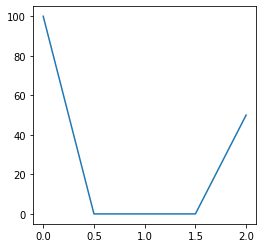

In [6]:
# Dibujar la temperatura de la barra el tiempo 0

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot()
plt.plot(x,T[0,:])

In [7]:
for j in range(1, len(T[:,0])):
    for i in range(1, Npoints_x-1):
        T[j,i] = T[j-1,i] + lambda_*(T[j-1,i+1] - 2*T[j-1,i] + T[j-1,i-1])

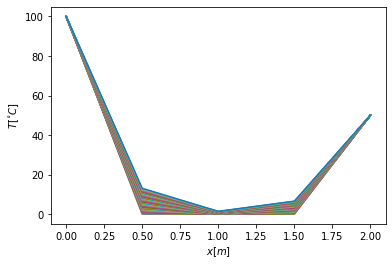

In [8]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()

plt.xlabel(r'$x[m]$')
plt.ylabel(r'$T[^{\circ}C]$')

for i in range(0, Npoints_t):
    plt.plot(x,T[i,:], label=r'T(x,%.2f)' %(t[i]))
    
#plt.legend(loc=0)
plt.show()

In [9]:
# Creemos la animacion

filenames = []

In [10]:
def CreateFigure(x,T,it):
    
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot()
    
    plt.ylim(0.,100.)
    
    plt.xlabel(r'$x[cm]$')
    plt.ylabel(r'$T[^{\circ}C]$')
    
    plt.plot(x,T, c='k',label=r'T(x,%.2f)' %(t[it]))
    plt.legend()
    
    filename = "Figures/%02d"%it + ".png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

In [11]:
for i in range(0, Npoints_t-1):
    CreateFigure(x,T[i,:],i)

In [12]:
!convert -loop 0 -delay 10 Figures/*.png Calor1D.gif
!rm Figures/*

# 2D heat equation

In [13]:
Xmin, Xmax, Npoints_x = 0.,1.,10
Ymin, Ymax, Npoints_y = 0.,1.,10
Tmin, Tmax, Npoints_t = 0.,2.,100

x = np.linspace(Xmin, Xmax, Npoints_x)
y = np.linspace(Ymin, Ymax, Npoints_y)
t = np.linspace(Tmin, Tmax, Npoints_t)

deltat = (Tmax-Tmin)/(Npoints_t-1)
deltax = (Xmax-Xmin)/(Npoints_x-1)
deltay = (Ymax-Ymin)/(Npoints_y-1)

# Constante de conductividad
k = 1.

lambda_ = k*deltat/deltax
mu_ = k*deltat/deltay

print(deltat, deltax, deltay, lambda_, mu_)

0.020202020202020204 0.1111111111111111 0.1111111111111111 0.18181818181818185 0.18181818181818185


In [14]:
#Definimos la condicion inicial
def ui(x,y):
    return np.sin(np.pi*(x+y))

In [15]:
# Mapa de temperatura
u = np.zeros((Npoints_t, Npoints_x, Npoints_y))
for i in range(len(x)):
    for j in range(len(y)):
        u[0,i,j] = ui(x[i], y[j]) # Llenamos el mapa con la condicion inicial

In [16]:
# Funcion de las condiciones de frontera

def h1(y,t):
    return 1

def h2(y,t):
    return 2

def h3(x,t):
    return 1

def h4(x,t):
    return 3

In [17]:
# Ajustamos las fronteras en x
for j in range(Npoints_y):
    u[:,j,0] = h1(y[j],t[j])  # Frontera a 
    u[:,j,-1] = h2(y[j],t[j]) # Frontera b
    
# Ajustamos las fronteras en y    
for i in range(Npoints_x):
    u[:,0,i] = h3(x[i],t[i])  # Frontera c
    u[:,-1,i] = h4(x[i],t[i]) # Frontera d

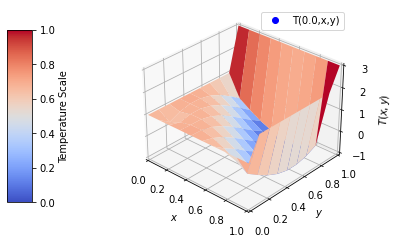

In [18]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1, projection = '3d')

ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(-1,3)

ax.set_xlabel('$x$', fontsize=10)
ax.set_ylabel('$y$', fontsize=10)
ax.set_zlabel('$T(x,y)$', fontsize=10)

X, Y = np.meshgrid(x,y)

ax.plot_surface(X,Y,u[0,:,:], cmap=cm.coolwarm)

ax.view_init(30,-48)

fake2Dline = mpl.lines.Line2D([0],[0], linestyle='none', c='b', marker='o')

ax.legend([fake2Dline], [r'T(%.1f,x,y)' %(t[0])], numpoints=1)

cax = fig.add_axes([0.05, 0.2, 0.05, 0.6]) 
cb = mpl.colorbar.ColorbarBase(cax, cmap=cm.coolwarm, norm=mpl.colors.Normalize(vmin=0., vmax=1.0),spacing='proportional')
cb.set_label('Temperature Scale')

plt.savefig('InitialHeatMap.png')
plt.show()


In [19]:
#Solucionar para todo tiempo
for l in range(1, len(u[:,0,0])):
    # En este espacio, modificar las fronteras si dependen del tiempo
    # NO tocar las fronteras a menos que dependan del tiempo
    for i in range(1, Npoints_x -1):
        for j in range(1, Npoints_y - 1):
            u[l,i,j] = (1.-2.*lambda_-2.*mu_)*u[l-1,i,j] \
            + lambda_*(u[l-1,i+1,j]+u[l-1,i-1,j]) \
            + mu_*(u[l-1,i,j+1] + u[l-1,i,j-1])

In [20]:

def CreateFigure(u,it):


    fig = plt.figure(figsize=(7,4))
    ax = fig.add_subplot(1,1,1, projection = '3d')

    ax.set_xlim3d(0, 1)
    ax.set_ylim3d(0, 1)
    ax.set_zlim3d(-1,3)
    
    ax.set_xlabel('$x$', fontsize=10)
    ax.set_ylabel('$y$', fontsize=10)
    ax.set_zlabel('$T(x,y)$', fontsize=10)

    X, Y = np.meshgrid(x,y)
    ax.plot_surface(X,Y,u, cmap=cm.coolwarm,linewidth=0, antialiased=False)

    ax.view_init(30,-48)
    
    fake2Dline = mpl.lines.Line2D([0],[0], linestyle='none', c='b', marker='o')
    
    ax.legend([fake2Dline], [r'T(%.2f,x,y)' %(t[it])], numpoints=1)
    
    cax = fig.add_axes([0.05, 0.2, 0.05, 0.6]) 
    cb = mpl.colorbar.ColorbarBase(cax, cmap=cm.coolwarm, spacing='proportional')
    cb.set_label('Temperature Scale')
    
    filename = "Figures/%02d"%it + ".png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

In [21]:
for i in range(0,Npoints_t):
    CreateFigure(u[i,:,:],i)

In [22]:
!convert -loop 0 -delay 10 Figures/*.png Calor2D.gif
!rm Figures/*